 Instalación de las librerías necesarias

In [3]:
! pip install pandas numpy matplotlib seaborn


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
! pip freeze > requirements.txt

Carga del archivo CSV en un Dataframe de Pandas:

In [28]:
import pandas as pd

# Carga del archivo CSV
df = pd.read_csv(r'C:\Users\bianc\OneDrive\Escritorio\proyectofinal\SalesFINAL12312016_Clean.csv')

In [29]:
print(df.head())  # Muestra las primeras filas

           InventoryId  Store  Brand                 Description        Size  \
0  1_HARDERSFIELD_1004      1   1004  Jim Beam w/2 Rocks Glasses       750mL   
1  1_HARDERSFIELD_1004      1   1004  Jim Beam w/2 Rocks Glasses       750mL   
2  1_HARDERSFIELD_1004      1   1004  Jim Beam w/2 Rocks Glasses       750mL   
3  1_HARDERSFIELD_1004      1   1004  Jim Beam w/2 Rocks Glasses       750mL   
4  1_HARDERSFIELD_1005      1   1005     Maker's Mark Combo Pack  375mL 2 Pk   

   SalesQuantity  SalesDollars  SalesPrice SalesDate  Volume  Classification  \
0              1         16.49       16.49  1/1/2016     750               1   
1              2         32.98       16.49  1/2/2016     750               1   
2              1         16.49       16.49  1/3/2016     750               1   
3              1         14.49       14.49  1/8/2016     750               1   
4              2         69.98       34.99  1/9/2016     375               1   

   ExciseTax  VendorNo                

In [39]:
import warnings
warnings.filterwarnings("ignore")

In [31]:
df.rename(columns={
    'InventoryId': 'InventarioID',
    'Store': 'Tienda',
    'Brand': 'Marca',
    'Description': 'Descripción',
    'Size': 'Tamaño',
    'SalesQuantity': 'CantidadVendida',
    'SalesDollars': 'VentasDólares',
    'SalesPrice': 'PrecioVenta',
    'SalesDate': 'FechaVenta',
    'Volume': 'Volumen',
    'Classification': 'Clasificación',
    'ExciseTax': 'ImpuestoEspecial',
    'VendorNo': 'NúmeroProveedor',
    'VendorName': 'NombreProveedor'
}, inplace=True)

In [32]:
print(df.head())  # Muestra las primeras filas

          InventarioID  Tienda  Marca                 Descripción      Tamaño  \
0  1_HARDERSFIELD_1004       1   1004  Jim Beam w/2 Rocks Glasses       750mL   
1  1_HARDERSFIELD_1004       1   1004  Jim Beam w/2 Rocks Glasses       750mL   
2  1_HARDERSFIELD_1004       1   1004  Jim Beam w/2 Rocks Glasses       750mL   
3  1_HARDERSFIELD_1004       1   1004  Jim Beam w/2 Rocks Glasses       750mL   
4  1_HARDERSFIELD_1005       1   1005     Maker's Mark Combo Pack  375mL 2 Pk   

   CantidadVendida  VentasDólares  PrecioVenta FechaVenta  Volumen  \
0                1          16.49        16.49   1/1/2016      750   
1                2          32.98        16.49   1/2/2016      750   
2                1          16.49        16.49   1/3/2016      750   
3                1          14.49        14.49   1/8/2016      750   
4                2          69.98        34.99   1/9/2016      375   

   Clasificación  ImpuestoEspecial  NúmeroProveedor  \
0              1              0.79   

Elimino las columnas que no voy a utilizar:

In [33]:
df.drop(columns=['Tamaño', 'VentasDólares', 'Volumen', 'Clasificación', 'NombreProveedor'], inplace=True)

In [34]:
print(df.head())  # Muestra las primeras filas

          InventarioID  Tienda  Marca                 Descripción  \
0  1_HARDERSFIELD_1004       1   1004  Jim Beam w/2 Rocks Glasses   
1  1_HARDERSFIELD_1004       1   1004  Jim Beam w/2 Rocks Glasses   
2  1_HARDERSFIELD_1004       1   1004  Jim Beam w/2 Rocks Glasses   
3  1_HARDERSFIELD_1004       1   1004  Jim Beam w/2 Rocks Glasses   
4  1_HARDERSFIELD_1005       1   1005     Maker's Mark Combo Pack   

   CantidadVendida  PrecioVenta FechaVenta  ImpuestoEspecial  NúmeroProveedor  
0                1        16.49   1/1/2016              0.79            12546  
1                2        16.49   1/2/2016              1.57            12546  
2                1        16.49   1/3/2016              0.79            12546  
3                1        14.49   1/8/2016              0.79            12546  
4                2        34.99   1/9/2016              0.79            12546  


In [40]:
df.rename(columns={
    'EnExistencia': 'ImpuestoEspecial',
    
}, inplace=True)

In [36]:
! pip freeze > requirements.txt

In [37]:
print(df.info())  # Información de columnas y tipos de datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 9 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   InventarioID      1048575 non-null  object 
 1   Tienda            1048575 non-null  int64  
 2   Marca             1048575 non-null  int64  
 3   Descripción       1048575 non-null  object 
 4   CantidadVendida   1048575 non-null  int64  
 5   PrecioVenta       1048575 non-null  float64
 6   FechaVenta        1048575 non-null  object 
 7   ImpuestoEspecial  1048575 non-null  float64
 8   NúmeroProveedor   1048575 non-null  int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 72.0+ MB
None


Visualización del tamaño del Dataframe (Filas y Columnas):

In [41]:
import numpy as np

In [16]:
np.shape(df)

(1048575, 9)

Conversión del tipo de datos:

In [42]:
df['FechaVenta'] = pd.to_datetime(df['FechaVenta'], format='%m/%d/%Y')
df['CantidadVendida'] = pd.to_numeric(df['CantidadVendida'], errors='coerce')
df['PrecioVenta'] = pd.to_numeric(df['PrecioVenta'], errors='coerce')
df['ImpuestoEspecial'] = pd.to_numeric(df['ImpuestoEspecial'], errors='coerce')

In [43]:
df.isnull().sum() #busco nulos

InventarioID        0
Tienda              0
Marca               0
Descripción         0
CantidadVendida     0
PrecioVenta         0
FechaVenta          0
ImpuestoEspecial    0
NúmeroProveedor     0
dtype: int64

In [44]:
duplicados = df[df.duplicated()]

print(duplicados)

Empty DataFrame
Columns: [InventarioID, Tienda, Marca, Descripción, CantidadVendida, PrecioVenta, FechaVenta, ImpuestoEspecial, NúmeroProveedor]
Index: []


No se encontraron duplicados

In [45]:
print(df.info())  # Información de columnas y tipos de datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 9 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   InventarioID      1048575 non-null  object        
 1   Tienda            1048575 non-null  int64         
 2   Marca             1048575 non-null  int64         
 3   Descripción       1048575 non-null  object        
 4   CantidadVendida   1048575 non-null  int64         
 5   PrecioVenta       1048575 non-null  float64       
 6   FechaVenta        1048575 non-null  datetime64[ns]
 7   ImpuestoEspecial  1048575 non-null  float64       
 8   NúmeroProveedor   1048575 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(2)
memory usage: 72.0+ MB
None


In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

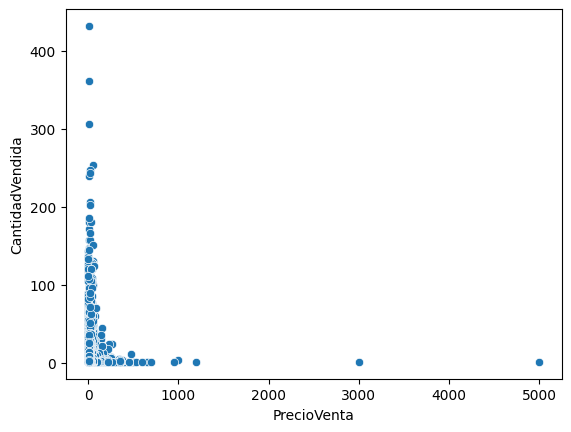

In [47]:
# Relación entre PrecioVenta y CantidadVendida
sns.scatterplot(data=df, x='PrecioVenta', y='CantidadVendida')
plt.show()

In [1]:
pip install sqlalchemy pyodbc

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [48]:
def calcular_estadisticas(data): 
    for columna in data.columns:
        if data[columna].dtype == 'float64' or data[columna].dtype == 'int64':
            print(columna)
            print('Mediana:', data[columna].median())
            print('Varianza: ', np.around((data[columna].var()),decimals=2)) # Casteo (redondeo) a 2 decimales
            print('Rango:', data[columna].max() - data[columna].min())
            print('Moda:', data[columna].mode()[0])
            print('--------------------------------')

calcular_estadisticas(df)

Tienda
Mediana: 39.0
Varianza:  593.28
Rango: 78
Moda: 15
--------------------------------
Marca
Mediana: 6296.0
Varianza:  154236867.07
Rango: 90031
Moda: 3606
--------------------------------
CantidadVendida
Mediana: 1.0
Varianza:  12.33
Rango: 431
Moda: 1
--------------------------------
PrecioVenta
Mediana: 12.99
Varianza:  197.39
Rango: 4999.5
Moda: 9.99
--------------------------------
ImpuestoEspecial
Mediana: 0.68
Varianza:  11.61
Rango: 378.51
Moda: 0.79
--------------------------------
NúmeroProveedor
Mediana: 4425.0
Varianza:  71009874.8
Rango: 173355
Moda: 3960
--------------------------------


In [49]:
# Guardar el DataFrame transformado
df.to_csv(r'C:\Users\bianc\OneDrive\Escritorio\proyectofinal\LimpiezaSalesFinal31122016', index=False)   

In [50]:
#carga archivo csv
df2 = pd.read_csv(r'C:\Users\bianc\OneDrive\Escritorio\proyectofinal\LimpiezaSalesFinal31122016')

In [51]:
print(df2.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 9 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   InventarioID      1048575 non-null  object 
 1   Tienda            1048575 non-null  int64  
 2   Marca             1048575 non-null  int64  
 3   Descripción       1048575 non-null  object 
 4   CantidadVendida   1048575 non-null  int64  
 5   PrecioVenta       1048575 non-null  float64
 6   FechaVenta        1048575 non-null  object 
 7   ImpuestoEspecial  1048575 non-null  float64
 8   NúmeroProveedor   1048575 non-null  int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 72.0+ MB
None


In [53]:
import pyodbc
import pandas as pd
from sqlalchemy import create_engine, types

ventas_df = pd.read_csv(r'C:\Users\bianc\OneDrive\Escritorio\proyectofinal\LimpiezaSalesFinal31122016')
# Asegurar que las columnas tengan los tipos de datos correctos
ventas_df['InventarioID'] = ventas_df['InventarioID'].astype(str)  # Convertir a string para usar VARCHAR en SQL
ventas_df['FechaVenta'] = pd.to_datetime(ventas_df['FechaVenta'])  # Asegurar que la fecha esté en formato datetime

# Crear la conexión con SQL Server usando autenticación de Windows
# Usando el nombre del servidor SQLEXPRESS y Trusted Connection
engine = create_engine('mssql+pyodbc://BIANCA\SQLEXPRESS/PremiumDrinks?trusted_connection=yes&driver=ODBC+Driver+18+for+SQL+Server&TrustServerCertificate=yes')

# Especificar los tipos de datos para cada columna en SQL Server
dtype_sql = {
    'InventarioID': types.VARCHAR(length=50),  # VARCHAR en SQL Server
    'Tienda': types.INTEGER,
    'Marca': types.INTEGER,
    'Descripción': types.VARCHAR(length=255),  # VARCHAR para descripción
    'CantidadVendida': types.FLOAT,
    'PrecioVenta': types.FLOAT,
    'FechaVenta': types.DATETIME,
    'ImpuestoEspecial': types.FLOAT,
    'NúmeroProveedor': types.INTEGER
}

# Exportar el DataFrame a una tabla SQL llamada Ventas2016
ventas_df.to_sql('Ventas2016', con=engine, if_exists='replace', index=False, dtype=dtype_sql)

print("Datos exportados exitosamente a la tabla Ventas2016 en la base de datos PremiumDrinks")

Datos exportados exitosamente a la tabla Ventas2016 en la base de datos PremiumDrinks
